# Importing Libraries

In [9]:
#pip install xgboost


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import xgboost

#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split,GridSearchCV

#Importing Machine Learning Model
#from catboost import CatBoostRegressor
#from ngboost import NGBRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
#from lightgbm import LGBMRegressor

#statistical Tools
from sklearn import metrics

# Reading CSV Files

In [11]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [12]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [13]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Removing columns with alot of null values

In [15]:
import seaborn as sns

<AxesSubplot:>

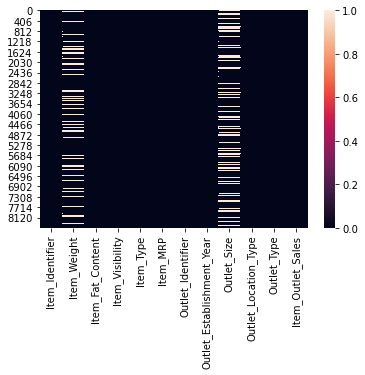

In [16]:
sns.heatmap(train.isnull())

In [17]:
df=pd.DataFrame(train)

In [18]:
df.drop("Outlet_Size",axis=1,inplace=True)

In [19]:
df.drop("Item_Weight",axis=1,inplace=True)

In [20]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [21]:
#sns.heatmap(df.isnull())

# Exploring  each variable

* Variable--   Description
* Item_Identifier--  Unique product ID
* Item_Weight-- Weight of product
* Item_Fat_Content--  Whether the product is low fat or not
* Item_Visibility--  The % of total display area of all products in a store allocated to the particular product
* Item_Type--  The category to which the product belongs
* Item_MRP--  Maximum Retail Price (list price) of the product
* Outlet_Identifier--  Unique store ID
* Outlet_Establishment_Year--  The year in which store was established
* Outlet_Size--  The size of the store in terms of ground area covered
* Outlet_Location_Type--  The type of city in which the store is located
* Outlet_Type--  Whether the outlet is just a grocery store or some sort of supermarket
*  Item_Outlet_Sales--  Sales of the product in the particular store. This is the outcome variable to be predicted.

product id does not matter us i.e the column named Item_Identifier is not of use right now.

In [22]:
df.drop("Item_Identifier",inplace=True,axis=1)

item weight dropped out earlier

In [23]:
print(len(np.unique(df["Item_Fat_Content"])))

5


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

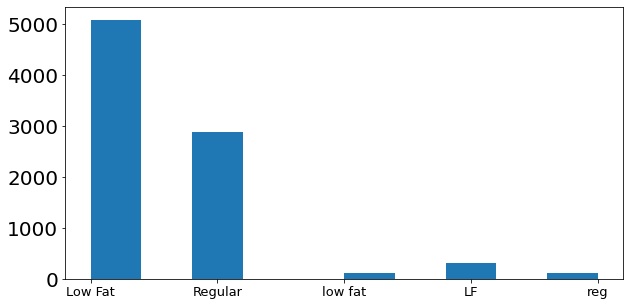

In [24]:
plt.figure(figsize=(10,5))
plt.hist(x="Item_Fat_Content",bins=10,data=df)
plt.yticks(size = 20)
plt.xticks(size = 13)

In [25]:
fat={"Low Fat":0,"Regular":1,"low fat":0,"LF":0,"reg":1}
df.Item_Fat_Content=[fat[item]for item in df.Item_Fat_Content]

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

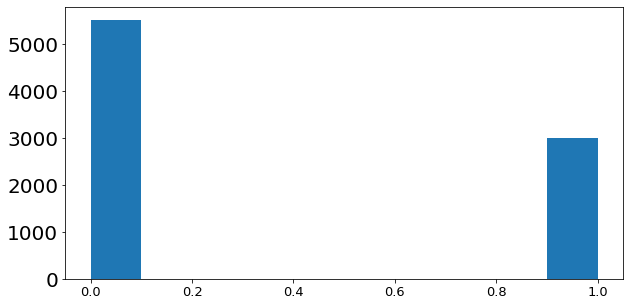

In [26]:
plt.figure(figsize=(10,5))
plt.hist(x="Item_Fat_Content",bins=10,data=df)
plt.yticks(size = 20)
plt.xticks(size = 13)

(array([-0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

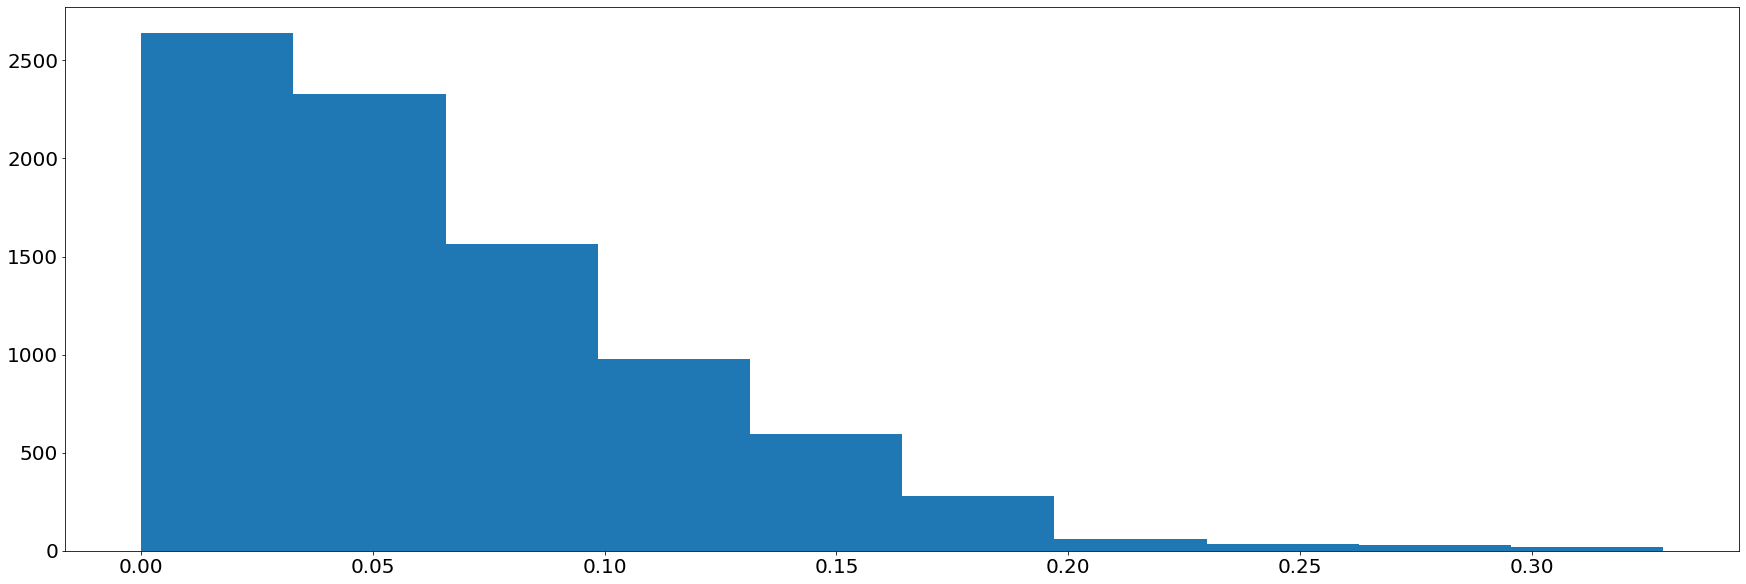

In [27]:
plt.figure(figsize=(30,10))
plt.hist(x="Item_Visibility",bins=10,data=df)
plt.yticks(size = 20)
plt.xticks(size = 20)

In [28]:
np.unique(df["Item_Type"])

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [29]:
temp=df.groupby('Item_Type',as_index=False)['Item_Visibility'].mean()
temp

,Item_Type,Item_Visibility
0,Baking Goods,0.069169
1,Breads,0.066255
2,Breakfast,0.085723
3,Canned,0.068129
4,Dairy,0.072427
5,Frozen Foods,0.065645
6,Fruits and Vegetables,0.068513
7,Hard Drinks,0.064943
8,Health and Hygiene,0.055216
9,Household,0.061322


In [30]:
itemtype={'Baking Goods':0, 'Breads':1, 'Breakfast':2, 'Canned':3, 'Dairy':4,
       'Frozen Foods':5, 'Fruits and Vegetables':6, 'Hard Drinks':7,
       'Health and Hygiene':12, 'Household':11, 'Meat':10, 'Others':9, 'Seafood':8,
       'Snack Foods':13, 'Soft Drinks':14, 'Starchy Foods':15}
df.Item_Type=[itemtype[item] for item in df.Item_Type]

In [31]:
df.drop("Outlet_Identifier",axis=1,inplace=True)

In [32]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,0.016047,4,249.8092,1999,Tier 1,Supermarket Type1,3735.1380
1,1,0.019278,14,48.2692,2009,Tier 3,Supermarket Type2,443.4228
2,0,0.016760,10,141.6180,1999,Tier 1,Supermarket Type1,2097.2700
3,1,0.000000,6,182.0950,1998,Tier 3,Grocery Store,732.3800
4,0,0.000000,11,53.8614,1987,Tier 3,Supermarket Type1,994.7052


In [33]:
df["Age_Outlet"]=2021-df["Outlet_Establishment_Year"]
df.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [34]:
print(len(np.unique(df["Item_Type"])))

16


(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

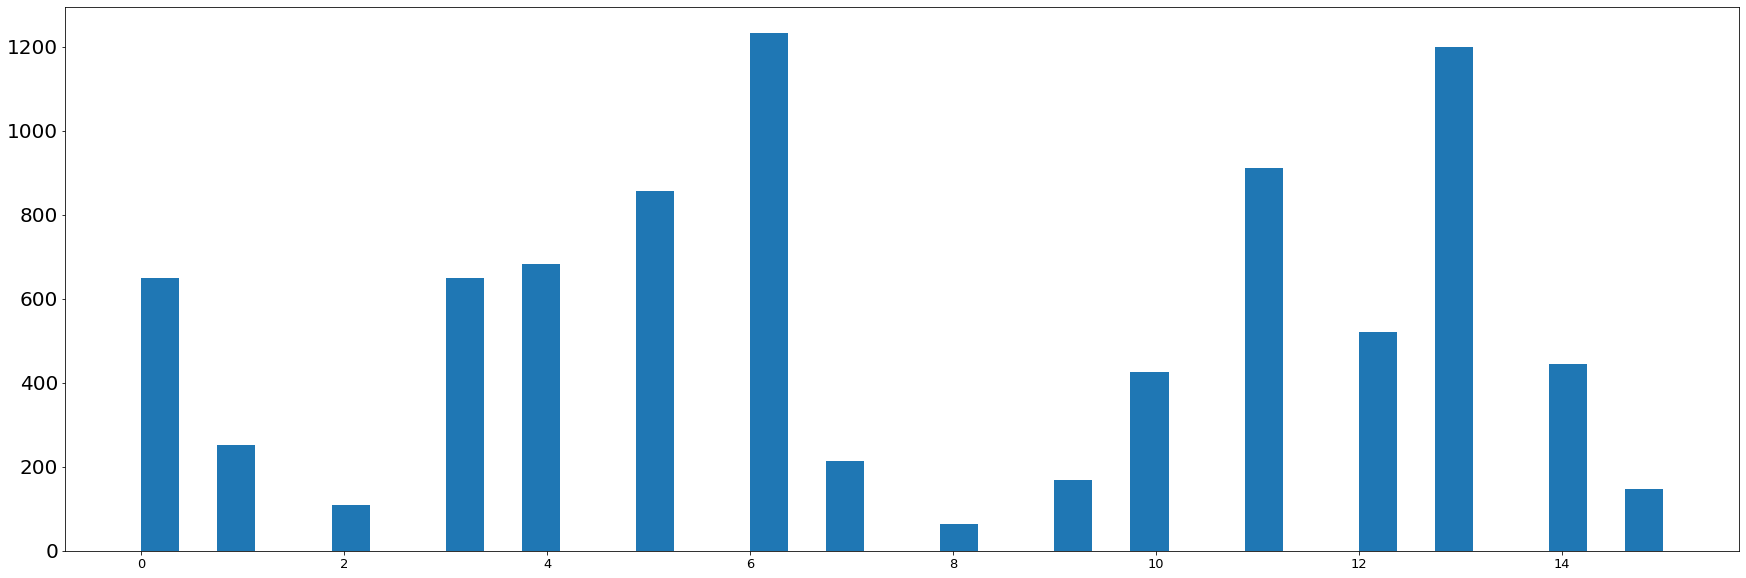

In [35]:
plt.figure(figsize=(30,10))
plt.hist(x="Item_Type",bins=40,data=df)
plt.yticks(size = 20)
plt.xticks(size = 13)

In [36]:
np.unique(df["Outlet_Type"])

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

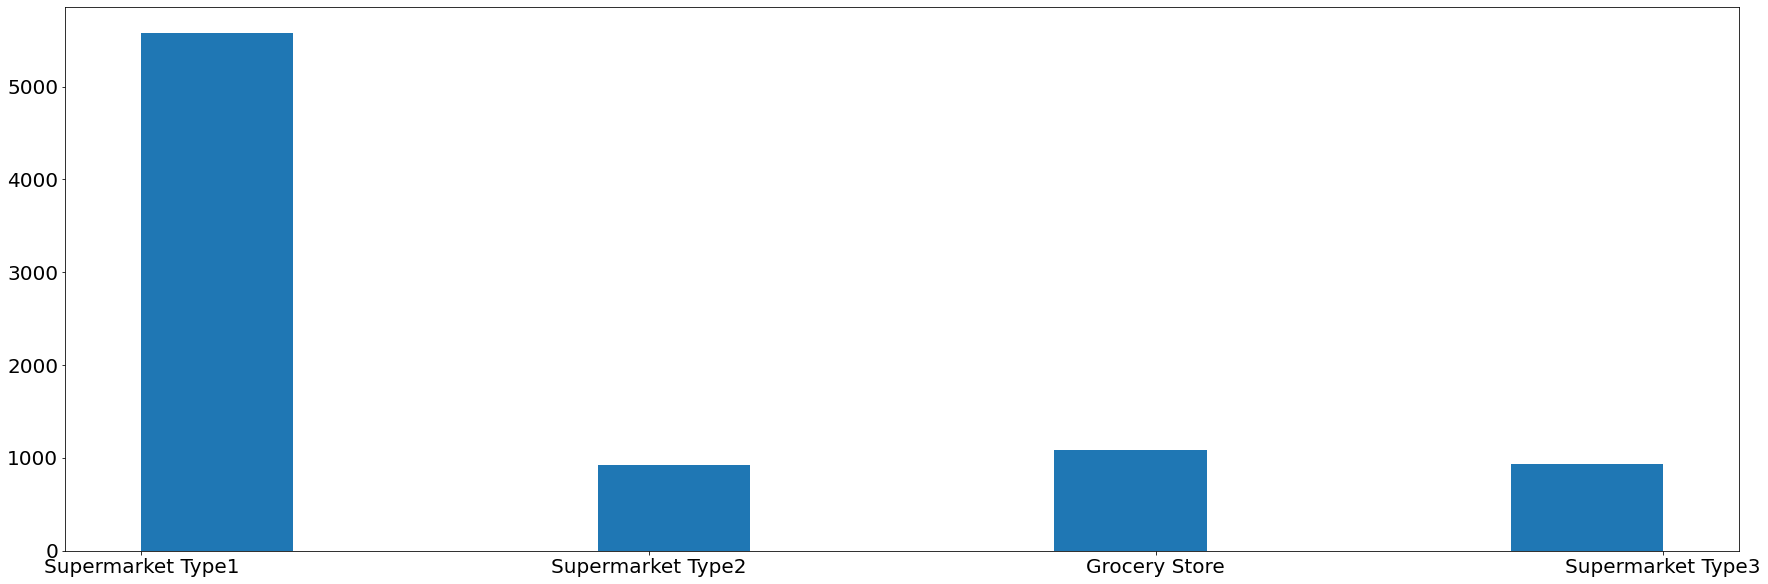

In [37]:
plt.figure(figsize=(30,10))
plt.hist(x="Outlet_Type",data=df)
plt.yticks(size = 20)
plt.xticks(size = 20)

In [38]:
df.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age_Outlet
0,0,0.016047,4,249.8092,Tier 1,Supermarket Type1,3735.1380,22
1,1,0.019278,14,48.2692,Tier 3,Supermarket Type2,443.4228,12
2,0,0.016760,10,141.6180,Tier 1,Supermarket Type1,2097.2700,22
3,1,0.000000,6,182.0950,Tier 3,Grocery Store,732.3800,23
4,0,0.000000,11,53.8614,Tier 3,Supermarket Type1,994.7052,34


In [39]:
np.unique(df.Outlet_Location_Type)

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [40]:
tier={'Tier 1':0, 'Tier 2':1, 'Tier 3':2}
df.Outlet_Location_Type=[tier[item] for item in df.Outlet_Location_Type]

In [41]:
market_type={'Grocery Store':0, 'Supermarket Type1':1, 'Supermarket Type2':2,
       'Supermarket Type3':3}
df.Outlet_Type=[market_type[item] for item in df.Outlet_Type]

{'whiskers': [<matplotlib.lines.Line2D at 0x29a3ad059a0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a3ad110a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a3ad05640>],
 'medians': [<matplotlib.lines.Line2D at 0x29a3ad11760>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a3ad11ac0>],
 'means': []}

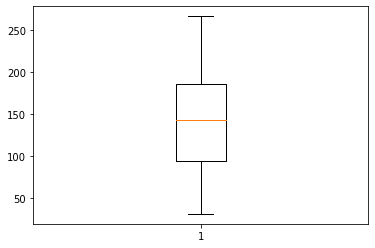

In [42]:
plt.boxplot(df["Item_MRP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x29a3b161bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x29a3b16f2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a3b161850>],
 'medians': [<matplotlib.lines.Line2D at 0x29a3b16f970>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a3b16fcd0>],
 'means': []}

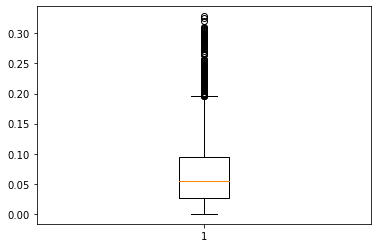

In [43]:
plt.boxplot(df["Item_Visibility"])

In [44]:
df["Item_Visibility"].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [45]:
df["Item_Visibility"].median()

0.053930934

In [46]:
q3,q1=np.percentile(df["Item_Visibility"],[75,25])
iqr=q3-q1

In [47]:
for i in range(len(df)):
    if df.loc[i,"Item_Visibility"]>1.5*iqr:
        df.loc[i,"Item_Visibility"]=0.066132

{'whiskers': [<matplotlib.lines.Line2D at 0x29a3b1f8160>,
 'caps': [<matplotlib.lines.Line2D at 0x29a3b1f8820>,
 'boxes': [<matplotlib.lines.Line2D at 0x29a3b1ecdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x29a3b1f8ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29a3b205280>],
 'means': []}

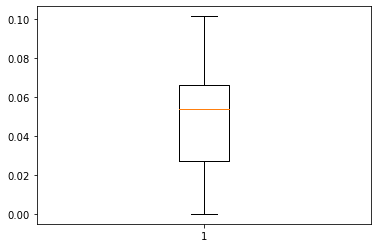

In [48]:
plt.boxplot(df["Item_Visibility"])

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linear_reg=LinearRegression()

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf=RandomForestRegressor()

In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
n_estimators=[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_depth=[int(x) for x in np.linspace(5, 30, num = 6)]
max_features=['auto','sqrt']
min_samples_split=[2,5,10,15,25,35,50]
min_samples_leaf=[1,2,5,10]

In [55]:
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [56]:
params={'n_estimators':n_estimators,
       
       'max_depth':max_depth,
        'max_features':max_features,
       'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf}

In [57]:
df.dtypes

Item_Fat_Content          int64
Item_Visibility         float64
Item_Type                 int64
Item_MRP                float64
Outlet_Location_Type      int64
Outlet_Type               int64
Item_Outlet_Sales       float64
Age_Outlet                int64
dtype: object

In [58]:
rf_ran=RandomizedSearchCV(estimator=rf,param_distributions=params,random_state=101,scoring='neg_mean_squared_error',cv=5,n_jobs=1,return_train_score=True,verbose=2,n_iter=10)

In [59]:
x_train,x_test,y_train,y_test=train_test_split(df.drop("Item_Outlet_Sales",axis=1),df["Item_Outlet_Sales"],test_size=0.8,random_state=42)

In [60]:
#rf_ran.fit(x_train,y_train)

In [61]:
#rf_ran.best_params_

In [62]:
#model=RandomForestRegressor(n_estimators=400,min_samples_split=50,min_samples_leaf= 1,max_features= 'auto',max_depth=5)

In [63]:
#model.fit(x_train,y_train)

In [64]:
#preds=model.predict(x_test)

In [65]:
#sns.distplot(preds-y_test)

In [66]:
#plt.scatter(preds,y_test)

In [67]:
#from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, preds))
#print('MSE:', metrics.mean_squared_error(y_test, preds))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [68]:
#reg=LinearRegression()
#model1=reg.fit(x_train,y_train)

In [69]:
#preds2=model1.predict(x_test)

In [70]:
#sns.distplot(preds2-y_test)

In [71]:
#plt.scatter(preds2,y_test)

In [72]:
#from sklearn import metrics
#print('MAE:', metrics.mean_absolute_error(y_test, preds2))
#print('MSE:', metrics.mean_squared_error(y_test, preds2))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds2)))

In [76]:
lr = LinearRegression()
rfc = ensemble.RandomForestRegressor(n_estimators=400, bootstrap=True, min_samples_leaf=100, min_samples_split=8, max_depth=6)
ada = ensemble.AdaBoostRegressor(n_estimators=1000, learning_rate=0.01)
gbr = ensemble.GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000, max_depth=5, min_samples_split=8, min_samples_leaf=100)
xgb = XGBRFRegressor(n_jobs=-1, n_estimators=1000, max_depth=5)
#cat = CatBoostRegressor(verbose=0)
dtr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
#lgbr = LGBMRegressor(n_estimators = 440, learning_rate=0.01, max_depth=12, objective='tweedie', num_leaves=15, num_threads = 4)
#ngb = NGBRegressor(minibatch_frac=0.5, col_sample=0.5, Base=dtr)
knn = KNeighborsRegressor()

mlp = MLPRegressor()

svr = SVR(kernel='linear', C=10, gamma='scale')

In [77]:
accuracy = {}
rmse = {}
explained_variance = {}
max_error = {}
MAE = {}

def train_model(model, model_name):
    print(model_name)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc = metrics.r2_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('R2_Score',acc)

    met = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE : ', met)
    rmse[model_name] = met

    var = (metrics.explained_variance_score(y_test, pred))
    print('Explained_Variance : ', var)
    explained_variance[model_name] = var

    error = (metrics.max_error(y_test, pred))
    print('Max_Error : ', error)
    max_error[model_name] = error
    
    err = metrics.mean_absolute_error(y_test, pred)
    print("Mean Absolute Error", err)
    MAE[model_name] = err

In [78]:
train_model(rfc, "Random Forest Regression")

Random Forest Regression
R2_Score 34.973805495812094
RMSE :  1368.393901081933
Explained_Variance :  0.350304722866146
Max_Error :  9179.752230293312
Mean Absolute Error 1010.0972418006863


In [80]:
#train_model(lgbr, "LightGBM Regression")

In [81]:
train_model(dtr, "Decision Tree Regression")

Decision Tree Regression
R2_Score 52.3083190920797
RMSE :  1171.8938503931117
Explained_Variance :  0.5237805442345845
Max_Error :  8378.25266990291
Mean Absolute Error 820.731900034245


In [83]:
#train_model(cat, "Cat boost Regression")

In [84]:
train_model(xgb, "XGB Regression")

XGB Regression
R2_Score 59.54426592885805
RMSE :  1079.3368468332576
Explained_Variance :  0.5966683291166408
Max_Error :  7011.00776875
Mean Absolute Error 760.5594752251076


In [85]:
train_model(mlp, "mlp")

mlp
R2_Score 34.78265691052508
RMSE :  1370.4036651429676
Explained_Variance :  0.3496654925882251
Max_Error :  9262.367482492518
Mean Absolute Error 1010.7762208997341


C:\Users\new\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [86]:
train_model(gbr, "gbr")

gbr
R2_Score 58.72440599206505
RMSE :  1090.2186987643363
Explained_Variance :  0.5881016959773502
Max_Error :  7497.332577686152
Mean Absolute Error 768.7184409734707


In [87]:
train_model(ada, "ada")

ada
R2_Score 56.47298600899104
RMSE :  1119.557485402499
Explained_Variance :  0.5734083803194092
Max_Error :  6968.153353424657
Mean Absolute Error 824.6749422732184


In [88]:
import pickle
# open a file, where you ant to store the data
file = open('model2.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)